In [ ]:
import json
import csv

# Filenames
geojson_files = ['wonomerto box tengah.geojson', 'wonomerto box atas.geojson']

# Open CSV for writing
with open('data_building_wonomerto.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'type', 'lat', 'lon'])  # header

    for filename in geojson_files:
        with open(filename, 'r') as f:
            data = json.load(f)
            for feature in data['features']:
                geom = feature['geometry']
                props = feature['properties']

                # Extract id or fallback
                feature_id = props.get('id') or feature.get('id') or ''

                # Handle different geometry types:
                if geom['type'] == 'Point':
                    lat, lon = geom['coordinates'][1], geom['coordinates'][0]
                    writer.writerow([feature_id, 'Point', lat, lon])
                elif geom['type'] == 'Polygon':
                    # Use centroid of polygon for lat/lon (approximate center)
                    coords = geom['coordinates'][0]  # outer ring
                    lats = [c[1] for c in coords]
                    lons = [c[0] for c in coords]
                    centroid_lat = sum(lats) / len(lats)
                    centroid_lon = sum(lons) / len(lons)
                    writer.writerow([feature_id, 'Polygon', centroid_lat, centroid_lon])
                elif geom['type'] == 'MultiPolygon':
                    # Use centroid of first polygon
                    coords = geom['coordinates'][0][0]  # first polygon outer ring
                    lats = [c[1] for c in coords]
                    lons = [c[0] for c in coords]
                    centroid_lat = sum(lats) / len(lats)
                    centroid_lon = sum(lons) / len(lons)
                    writer.writerow([feature_id, 'MultiPolygon', centroid_lat, centroid_lon])


              id            @id building  \
0  way/862851524  way/862851524      yes   
1  way/862852731  way/862852731      yes   
2  way/862852732  way/862852732      yes   
3  way/862852733  way/862852733      yes   
4  way/862852734  way/862852734      yes   

                                            geometry  
0  POLYGON ((109.78456 -7.071, 109.7846 -7.07112,...  
1  POLYGON ((109.78428 -7.07016, 109.78422 -7.070...  
2  POLYGON ((109.78333 -7.07131, 109.78331 -7.071...  
3  POLYGON ((109.78331 -7.07139, 109.78329 -7.071...  
4  POLYGON ((109.78331 -7.07113, 109.78334 -7.071...  


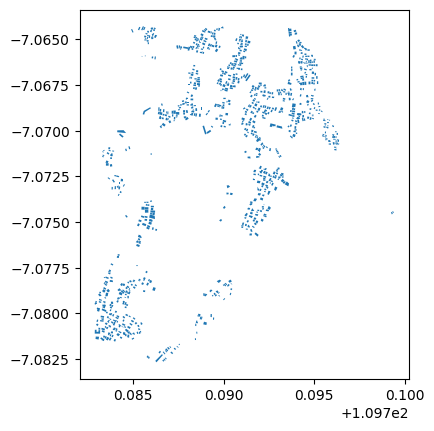

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file
gdf = gpd.read_file('wonomerto box tengah.geojson')

# Show the data
print(gdf.head())

# Plot the geometries
gdf.plot()
plt.show()

              id            @id building  \
0  way/864759287  way/864759287      yes   
1  way/864759288  way/864759288      yes   
2  way/864759289  way/864759289      yes   
3  way/864759290  way/864759290      yes   
4  way/864759291  way/864759291      yes   

                                            geometry  
0  POLYGON ((109.7949 -7.04904, 109.79504 -7.0494...  
1  POLYGON ((109.7937 -7.05316, 109.79375 -7.0532...  
2  POLYGON ((109.79379 -7.05217, 109.79374 -7.052...  
3  POLYGON ((109.79253 -7.05355, 109.7926 -7.0535...  
4  POLYGON ((109.79376 -7.05145, 109.79381 -7.051...  


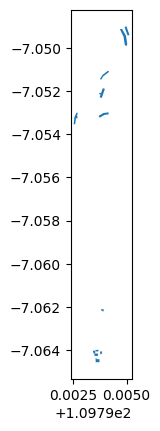

In [ ]:
# Load GeoJSON file
gdf = gpd.read_file('wonomerto box atas.geojson')

# Show the data
print(gdf.head())

# Plot the geometries
gdf.plot()
plt.show()

In [ ]:
import json
import csv

# List your geojson files here
geojson_files = ['wonomerto box tengah.geojson', 'wonomerto box atas.geojson']

# To collect all keys for CSV header
all_keys = set()

# First pass: gather all property keys
for filename in geojson_files:
    with open(filename) as f:
        data = json.load(f)
        for feature in data['features']:
            all_keys.update(feature.get('properties', {}).keys())

# Add geometry info keys
all_keys.update(['geometry_type', 'coordinates'])

# Convert set to sorted list for consistent column order
header = sorted(all_keys)

# Write CSV file
with open('data_wonomerto.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=header)
    writer.writeheader()

    for filename in geojson_files:
        with open(filename) as f:
            data = json.load(f)
            for feature in data['features']:
                row = {}
                props = feature.get('properties', {})

                # Add all properties first
                for key in all_keys:
                    if key in props:
                        row[key] = props[key]
                    else:
                        row[key] = ''

                # Add geometry info
                geom = feature.get('geometry', {})
                row['geometry_type'] = geom.get('type', '')

                # Coordinates: convert to string for CSV
                coords = geom.get('coordinates', '')
                row['coordinates'] = json.dumps(coords)

                writer.writerow(row)

print("CSV export done!")


CSV export done!
